# Long Short Term Memory (LSTM) 
# For Trading Socks

* Scraping Stock prices from Yahoo-Finance  
* Model: LSTM for predicting the stock price 'trend'. 
* Strategy: Enter to the long position if LSTM is predicting up-trend and close the position if LSTM is predicting down-trend.        
* Trading based on the trend based on the model is promissing!

# 1. Importing Data

### Importing the libraries

In [1]:
import time

In [2]:
in_time=time.perf_counter()

In [3]:
Symbol ='FICO'#'XLM-USD'#'BTC-USD'#'AEF'#'ADT'#'AAPL'#'OPTT'#'ADT'#'TSLA'#'ACER'#'ACB'#'ABEV'#'GOOGL'#'ACIU'##'SELB'##  'ABEV' #'AAPL' #'GOOGL' #'AAU'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

### Importing the stock price data

In [5]:
pip install yfinance

In [6]:
import yfinance as yf

#define the ticker symbol


#get data on this ticker
tickerData = yf.Ticker(Symbol)

#get the historical prices for this ticker
data = tickerData.history( start='2015-1-1', end='2021-7-6')
datatest=tickerData.history( start='2021-02-10', end='2021-7-6')
#see your data
data
datatest.to_csv('data_test.csv')
#data
pd.read_csv('data_test.csv')

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-02-10,480.380005,480.829987,466.579987,472.070007,255000,0,0
1,2021-02-11,473.100006,476.459991,468.230011,470.329987,215600,0,0
2,2021-02-12,469.769989,477.739990,465.540009,473.779999,344400,0,0
3,2021-02-16,473.299988,475.250000,464.440002,466.130005,173200,0,0
4,2021-02-17,461.339996,471.160004,452.809998,469.239990,270800,0,0
...,...,...,...,...,...,...,...,...
95,2021-06-28,501.570007,507.730011,501.570007,506.369995,114400,0,0
96,2021-06-29,508.390015,513.090027,505.579987,511.769989,155200,0,0
97,2021-06-30,510.250000,513.770020,502.450012,502.679993,145400,0,0
98,2021-07-01,503.529999,510.619995,500.320007,500.320007,297600,0,0


# 2. Overview of data

Text(0.5, 1.0, 'FICO stock price')

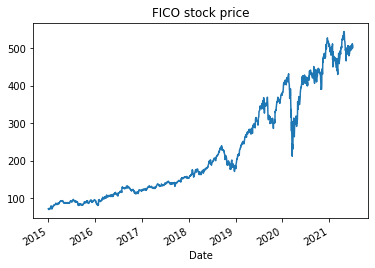

In [7]:
data['Close'].plot()
plt.title(f'{Symbol}'+' stock price')
# plt.show()

In [8]:
len(data.iloc[:,0:1].values)

1637

In [9]:
Keep_Days=100
training_set=data.iloc[:-Keep_Days,0:1].values
len(training_set)

1537

In [10]:
data.iloc[-100,:]

Open               480.380005
High               480.829987
Low                466.579987
Close              472.070007
Volume          255000.000000
Dividends            0.000000
Stock Splits         0.000000
Name: 2021-02-10 00:00:00, dtype: float64

# 3. Feature engineering

### Feature Scaling

In [11]:
training_set;

In [12]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#sc = StandardScaler()
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [13]:
n=60

In [14]:
X_train = []
y_train = []
for i in range(n, len(training_set)):
    X_train.append(training_set_scaled[i-n:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [15]:
X_train.shape

(1477, 60)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train.shape

(1477, 60, 1)

# 4. Model building

## Building and Training the LSTM

### Importing the Keras libraries and packages

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the LSTM

In [19]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units =50, return_sequences = True))
# regressor.add(Dropout(0.2))

In [23]:
regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

### Adding the output layer

In [25]:
regressor.add(Dense(units = 1))

In [26]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 91,251
Trainable params: 91,251
Non-trainable params: 0
____________________________________________________

# 5. Compiling the LSTM

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the LSTM to the Training set

In [28]:
regressor.fit(X_train, y_train, epochs = 30, batch_size =64)

Epoch 1/30
24/24 [==============================] - 29s 180ms/step - loss: 0.0781
Epoch 2/30
24/24 [==============================] - 4s 181ms/step - loss: 0.0042
Epoch 3/30
24/24 [==============================] - 4s 176ms/step - loss: 0.0022
Epoch 4/30
24/24 [==============================] - 4s 181ms/step - loss: 0.0024
Epoch 5/30
24/24 [==============================] - 4s 181ms/step - loss: 0.0023
Epoch 6/30
24/24 [==============================] - 4s 182ms/step - loss: 0.0024
Epoch 7/30
24/24 [==============================] - 4s 176ms/step - loss: 0.0021
Epoch 8/30
24/24 [==============================] - 4s 180ms/step - loss: 0.0020
Epoch 9/30
24/24 [==============================] - 4s 186ms/step - loss: 0.0015
Epoch 10/30
24/24 [==============================] - 4s 186ms/step - loss: 0.0023
Epoch 11/30
24/24 [==============================] - 4s 181ms/step - loss: 0.0018
Epoch 12/30
24/24 [==============================] - 4s 177ms/step - loss: 0.0014
Epoch 13/30
24/24 [=====

# 6. Making the predictions

In [29]:
real_stock_price = data.iloc[-Keep_Days:, 0:1].values

In [30]:
len(real_stock_price)

100

### Getting the predicted stock price

In [31]:
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = data.iloc[len(data)- len(real_stock_price) -n:,0:1].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(n, n+len(real_stock_price)):
    X_test.append(inputs[i-n:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [32]:
len(predicted_stock_price)

100

In [33]:
def f(l):
    l=np.array(l)
    l=l.reshape(-1,1)
    l=sc.transform(l)
    y= regressor.predict(np.array([l]))
    y=sc.inverse_transform(y)
    return y[0][0]

In [34]:
X_test.shape

(100, 60, 1)

# 7. Visualising the results

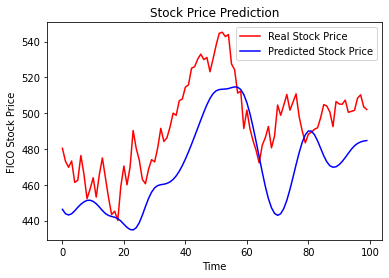

In [35]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(Symbol+' Stock Price')
plt.legend()
plt.show()

In [36]:
real_stock_price

array([[480.38000488],
       [473.1000061 ],
       [469.76998901],
       [473.29998779],
       [461.33999634],
       [462.54000854],
       [476.33999634],
       [465.95999146],
       [452.26998901],
       [457.66000366],
       [463.92999268],
       [453.13000488],
       [465.58999634],
       [475.        ],
       [463.79998779],
       [452.79998779],
       [443.38000488],
       [445.29000854],
       [440.1000061 ],
       [459.16000366],
       [470.48999023],
       [460.01000977],
       [469.79998779],
       [490.32000732],
       [480.3500061 ],
       [473.77999878],
       [463.02999878],
       [460.61999512],
       [468.63000488],
       [474.02999878],
       [472.80999756],
       [480.69000244],
       [491.54000854],
       [484.22000122],
       [486.26998901],
       [492.26000977],
       [500.        ],
       [498.82000732],
       [506.92001343],
       [507.92001343],
       [514.5300293 ],
       [515.79998779],
       [525.10998535],
       [525

# 8. Backtesing

In [37]:
pip install backtrader

In [38]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

In [39]:
# Create a Stratey
class TestStrategy(bt.Strategy):
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))


    # params = (
    #     ("period", 2),
    #     ("af", 0.02),
    #     ("afmax", 0.2)
    #     )
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        # self.psar = bt.indicators.ParabolicSAR(period=self.p.period, af=self.p.af, afmax=self.p.afmax)




        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        #############################################self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:
            
            X1=[self.dataclose[i] for i in range(-n,0)]
            X2=[self.dataclose[i] for i in range(-n+1,1)]
            # Not yet ... we MIGHT BUY if ...
            if   f(X1)<f(X2) :
                    # current close less than previous close

                    #if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                self.log('LONG CREATE, %.2f' % self.dataclose[0])

                    # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
            
            # elif  f(X2) < f(X1):# and self.dataclose[0]<self.psar:
            #     self.log('SHORT CREATE, %.2f' % self.dataclose[0])
            #     self.order = self.sell()

        else:
            
            X1=[self.dataclose[i] for i in range(-n,0)]
            X2=[self.dataclose[i] for i in range(-n+1,1)]
            # Already in the market ... we might sell
            if (self.position.size)>0 and (f(X2)<f(X1)) :
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('CLOSE CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.close()
            # elif  (self.position.size)<0 and f(X1) < f(X2):
            #     self.log('CLOSE CREATE, %.2f' % self.dataclose[0])
            #     self.order = self.close()

In [40]:
cerebro = bt.Cerebro()

In [41]:
cerebro.addstrategy(TestStrategy)

0

In [42]:
data = bt.feeds.GenericCSVData(
    dataname='data_test.csv',

    fromdate=datetime.datetime(2021, 2, 10),
    todate=datetime.datetime(2021, 7, 6),

    nullvalue=0.0,

    dtformat=('%Y-%m-%d'),

    datetime=0,
    high=2,
    low=3,
    open=1,
    close=4,
    volume=5,
    openinterest=-1
)

In [43]:
#data_backtest = bt.feeds.YahooFinanceData(dataname = Symbol, fromdate = datetime.datetime(2020,10,2), todate = datetime.datetime(2021, 2, 26),reverse=False)

In [44]:
cerebro.adddata(data)

In [45]:
# Set our desired cash start
cerebro.broker.setcash(100000.0)

In [46]:
cerebro.addsizer(bt.sizers.PercentSizer, percents = 98)

In [47]:
# Set the commission - 0.1% ... divide by 100 to remove the %
cerebro.broker.setcommission(commission=0.001)

In [48]:
# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run over everything
cerebro.run()

# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2021-03-03, LONG CREATE, 455.13
2021-03-04, BUY EXECUTED, Price: 452.80, Cost: 97498.29, Comm 97.50
2021-03-08, CLOSE CREATE, 429.86
2021-03-09, SELL EXECUTED, Price: 440.10, Cost: 97498.29, Comm 94.76
2021-03-09, OPERATION PROFIT, GROSS -2734.60, NET -2926.86
2021-03-12, LONG CREATE, 464.33
2021-03-15, BUY EXECUTED, Price: 469.80, Cost: 96252.37, Comm 96.25
2021-04-30, CLOSE CREATE, 521.41
2021-05-03, SELL EXECUTED, Price: 524.27, Cost: 96252.37, Comm 107.41
2021-05-03, OPERATION PROFIT, GROSS 11159.79, NET 10956.13
2021-05-20, LONG CREATE, 501.24
2021-05-21, BUY EXECUTED, Price: 504.53, Cost: 106563.57, Comm 106.56
2021-06-07, CLOSE CREATE, 484.71
2021-06-08, SELL EXECUTED, Price: 489.39, Cost: 106563.57, Comm 103.37
2021-06-08, OPERATION PROFIT, GROSS -3197.77, NET -3407.70
2021-06-16, LONG CREATE, 493.60
2021-06-17, BUY EXECUTED, Price: 492.48, Cost: 102296.49, Comm 102.30
Final Portfolio Value: 107703.57


In [49]:
 pip install matplotlib==3.2.2

<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 4 Axes>]]

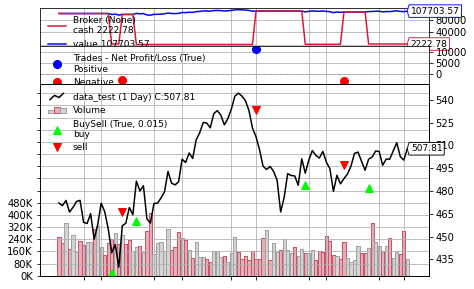

In [50]:
cerebro.plot()

In [51]:
cerebro.broker.getvalue()

107703.56851063677

In [52]:
out_time=time.perf_counter()
out_time-in_time

196.76328917499995

# 9. Summery 

* Scraping Stock prices from Yahoo-Finance  
* Model: LSTM for predicting the stock price 'trend'. 
* Strategy: Enter to the long position if LSTM is predicting up-trend and close the position if LSTM is predicting down-trend.          
* Trading based on the trend based on the model is promissing!  
(Trading with $100k demonstrated from 2/10/2020 to 7/10/2021 for an arbitrary stock)